In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from datetime import date

In [2]:
# Read in merged csv file and display data
ins_claim_fraud = pd.read_csv("CSV Files/insurance_claims_data.csv")
ins_claim_fraud.head()

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
0,TXN00000001,A00003822,PLC00008468,6/23/2015,5/16/2020,5/21/2020,Health,157.13,9000,Christopher Demarest,...,VNDR00556,Amy Wangler,1/6/1994,Nashville,TN,37217,Ramsey Inc,Panama City,FL,32405.0
1,TXN00000258,A00003072,PLC00008557,2/15/2014,5/27/2020,6/1/2020,Life,57.15,54000,Tommy Young,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
2,TXN00002428,A00001447,PLC00004391,1/30/2015,8/23/2020,8/28/2020,Life,65.06,13000,Kathy Keim,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
3,TXN00002811,A00001822,PLC00009369,8/22/2012,9/6/2020,9/11/2020,Life,87.16,42000,George Schmidt,...,NaN,Amy Wangler,1/6/1994,Nashville,TN,37217,NaN,NaN,NaN,NaN
4,TXN00002861,A00006019,PLC00006747,2/5/2017,9/14/2020,9/17/2020,Mobile,11.85,500,Allan Baumeister,...,VNDR00344,Amy Wangler,1/6/1994,Nashville,TN,37217,Lewis Ltd,Montgomery,AL,36104.0


In [3]:
# Display last 5 rows in csv
ins_claim_fraud.tail()

,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFFECTIVE_DATE,LOSS_DATE,REPORT_DATE,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,...,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,EMPLOYEE CITY,EMPLOYEE STATE,EMPLOYEE POSTAL_CODE,VENDOR_NAME,VENDOR CITY,VENDOR STATE,VENDOR POSTAL_CODE
9995,TXN00008381,A00006144,PLC00005140,10/23/2012,4/15/2021,4/20/2021,Life,64.16,93000,Ana Garcia,...,VNDR00378,Angel Alexander,8/26/2012,Manchester,CT,6040,"Reed, Bartlett and Miles",Savannah,GA,31401.0
9996,TXN00008462,A00004250,PLC00009507,8/30/2019,4/20/2021,4/25/2021,Mobile,9.76,300,Roy Sipp,...,NaN,Angel Alexander,8/26/2012,Manchester,CT,6040,NaN,NaN,NaN,NaN
9997,TXN00009410,A00004412,PLC00005536,11/25/2019,6/5/2021,6/5/2021,Motor,97.78,3000,Josephine Williams,...,VNDR00580,Angel Alexander,8/26/2012,Manchester,CT,6040,Dennis LLC,Nashville,TN,37207.0
9998,TXN00009756,A00003267,PLC00007273,9/29/2012,6/1/2021,6/6/2021,Mobile,7.64,200,Daniel Benninger,...,VNDR00383,Angel Alexander,8/26/2012,Manchester,CT,6040,"Dawson, Taylor and Chavez",Norwood,MA,2062.0
9999,TXN00008671,A00006937,PLC00007149,1/11/2016,5/8/2021,5/8/2021,Life,73.51,49000,Frances Clark,...,NaN,Charlotte Payne,10/12/2012,Manchester,CT,6040,NaN,NaN,NaN,NaN


In [4]:
incident_cities_unique = len(ins_claim_fraud["INCIDENT_CITY"].unique())
incident_cities_unique

407

In [5]:
incident_count = ins_claim_fraud["INCIDENT_CITY"].value_counts()
incident_count

INCIDENT_CITY
Manchester    606
Washington    594
Montgomery    584
Glendale      582
Arvada        558
             ... 
Soquel          1
Fair Haven      1
East Haven      1
Norwood         1
Longmeadow      1
Name: count, Length: 406, dtype: int64

In [6]:
incident_state_unique = len(ins_claim_fraud["INCIDENT_STATE"].unique())
incident_state_unique

16

In [7]:
incident_state_count = ins_claim_fraud["INCIDENT_STATE"].value_counts()
incident_state_count

INCIDENT_STATE
CA    1048
CO     707
FL     689
AZ     637
CT     619
AL     612
MD     597
GA     592
DC     587
OK     582
AR     581
TN     581
MA     576
KY     536
AK     529
VT     527
Name: count, dtype: int64

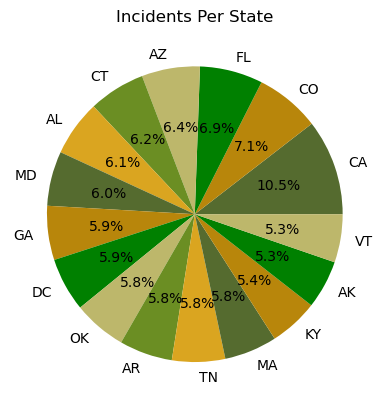

In [8]:
# Incident State Pie Chart

colors = ['darkolivegreen', 'darkgoldenrod', 'green', 'darkkhaki', 'olivedrab', 'goldenrod']
incident_state_count.plot(kind="pie", colors=colors, autopct= "%1.1f%%")
plt.title("Incidents Per State")
plt.ylabel("")
plt.show()

We can see from the above pie chart than over 1/10th of the insurance fraud data came from California

In [9]:
incident_hour_unique = len(ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].unique())
incident_hour_unique

24

In [10]:
incident_hour_count = ins_claim_fraud["INCIDENT_HOUR_OF_THE_DAY"].value_counts()
incident_hour_count

INCIDENT_HOUR_OF_THE_DAY
15    462
6     461
18    445
17    441
22    440
10    436
5     434
19    430
9     414
14    413
16    411
11    411
13    409
21    404
0     404
2     403
8     403
20    402
4     402
12    402
23    401
3     395
7     394
1     383
Name: count, dtype: int64

In [11]:
vender_unique = len(ins_claim_fraud["VENDOR_NAME"].unique())
vender_unique

404

In [12]:
vender_count = ins_claim_fraud["VENDOR_NAME"].value_counts()
vender_count

VENDOR_NAME
Thompson Inc                      38
Anderson Inc                      35
Garcia PLC                        31
Hill LLC                          31
Hicks, Patton and Cook            28
                                  ..
Ortega-Michael                     9
Johnson, Hernandez and Mcguire     9
Watkins Inc                        9
Knight-Ortiz                       8
Miller, Perez and Cannon           6
Name: count, Length: 403, dtype: int64

In [13]:
police_rep_count = ins_claim_fraud["POLICE_REPORT_AVAILABLE"].value_counts()
police_rep_count

POLICE_REPORT_AVAILABLE
1    6928
0    3072
Name: count, dtype: int64

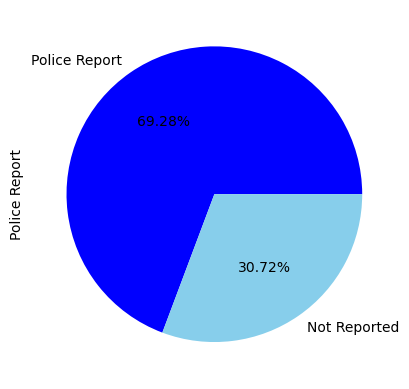

In [14]:
# Pie chart to show if police report exists
colors = ['blue', 'skyblue']
labels = ['Police Report', 'Not Reported']
police_rep_count.plot(kind="pie", colors=colors, labels = labels, autopct= "%1.2f%%")
plt.ylabel("Police Report")
plt.show()

In [15]:
injury_count = ins_claim_fraud["ANY_INJURY"].value_counts()
injury_count

ANY_INJURY
1    6991
0    3009
Name: count, dtype: int64

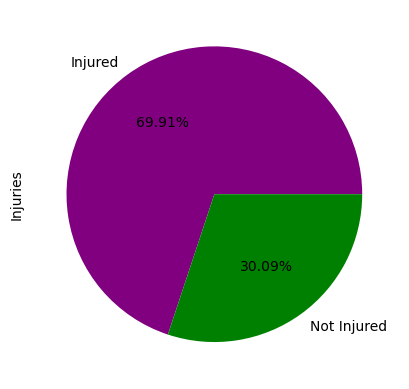

In [16]:
# Pie chart to show if injuries occurred
colors = ['purple', 'green']
labels = ['Injured', 'Not Injured']
injury_count.plot(kind="pie", colors=colors, labels = labels, autopct= "%1.2f%%")
plt.ylabel("Injuries")
plt.show()


In [17]:
severity_count = ins_claim_fraud["INCIDENT_SEVERITY"].value_counts()
severity_count

INCIDENT_SEVERITY
Total Loss    3390
Major Loss    3317
Minor Loss    3293
Name: count, dtype: int64

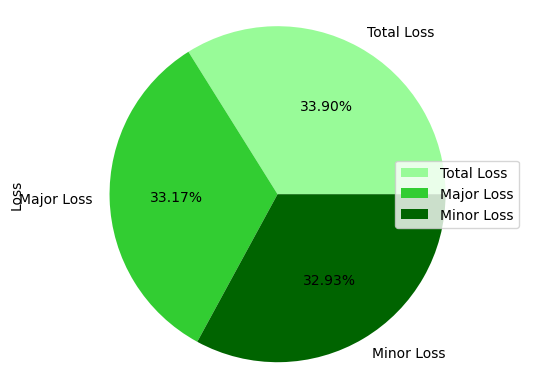

In [18]:
# Pie plot to show incident severity
colors = ['palegreen', 'limegreen', 'darkgreen']
labels = ['Total Loss', 'Major Loss', 'Minor Loss']
severity_count.plot(kind="pie", colors=colors, autopct= "%1.2f%%")

plt.legend(labels, loc="right")
plt.axis('equal')

plt.ylabel("Loss")
plt.show()

In [19]:
authority_count = ins_claim_fraud["AUTHORITY_CONTACTED"].value_counts()
authority_count

AUTHORITY_CONTACTED
Ambulance    4082
Police       2982
Other         991
Name: count, dtype: int64

In [20]:
risk_count = ins_claim_fraud["RISK_SEGMENTATION"].value_counts()
risk_count

RISK_SEGMENTATION
L    4395
M    4150
H    1455
Name: count, dtype: int64

In [21]:
claim_status_count = ins_claim_fraud["CLAIM_STATUS"].value_counts()
claim_status_count

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

In [22]:
claim_amount_unique = len(ins_claim_fraud["CLAIM_AMOUNT"].unique())
claim_amount_unique

107

In [23]:
claim_amount_count = ins_claim_fraud["CLAIM_AMOUNT"].value_counts()
claim_amount_count

CLAIM_AMOUNT
1000     585
2000     584
5000     573
4000     567
3000     563
        ... 
62000     12
88000     12
94000     11
98000     11
66000     10
Name: count, Length: 107, dtype: int64

In [24]:
education_unique = len(ins_claim_fraud["CUSTOMER_EDUCATION_LEVEL"].unique())
education_unique

7

In [25]:
education_count = ins_claim_fraud["CUSTOMER_EDUCATION_LEVEL"].value_counts()
education_count

CUSTOMER_EDUCATION_LEVEL
Bachelor       3991
High School    2385
Masters        1045
College        1035
MD              539
PhD             476
Name: count, dtype: int64

In [26]:
employment_count = ins_claim_fraud["EMPLOYMENT_STATUS"].value_counts()
employment_count

EMPLOYMENT_STATUS
Y    9171
N     829
Name: count, dtype: int64

In [27]:
tenure_unique = len(ins_claim_fraud["TENURE"].unique())
tenure_unique

114

In [28]:
tenure_count = ins_claim_fraud["TENURE"].value_counts()
tenure_count

TENURE
31     107
80     105
75     104
108    103
42     103
      ... 
41      72
6       71
114     70
70      70
98      66
Name: count, Length: 114, dtype: int64

In [29]:
social_class_count = ins_claim_fraud["SOCIAL_CLASS"].value_counts()
social_class_count

SOCIAL_CLASS
MI    4794
LI    2727
HI    2479
Name: count, dtype: int64

In [30]:
house_type_count = ins_claim_fraud["HOUSE_TYPE"].value_counts()
house_type_count

HOUSE_TYPE
Mortgage    3652
Rent        3385
Own         2963
Name: count, dtype: int64

In [31]:
family_size_unique = len(ins_claim_fraud["NO_OF_FAMILY_MEMBERS"].unique())
family_size_unique

6

In [32]:
family_size_count = ins_claim_fraud["NO_OF_FAMILY_MEMBERS"].value_counts()
family_size_count

NO_OF_FAMILY_MEMBERS
2    1690
3    1683
7    1674
4    1667
5    1647
6    1639
Name: count, dtype: int64

In [33]:
# checking if the dataset contains any null values 
ins_claim_fraud.isnull().any() 

TRANSACTION_ID              False
CUSTOMER_ID                 False
POLICY_NUMBER               False
POLICY_EFFECTIVE_DATE       False
LOSS_DATE                   False
REPORT_DATE                 False
INSURANCE_TYPE              False
PREMIUM_AMOUNT              False
CLAIM_AMOUNT                False
CUSTOMER_NAME               False
INSURANCE CITY               True
INSURANCE STATE             False
INSURANCE POSTAL_CODE       False
MARITAL_STATUS              False
AGE                         False
TENURE                      False
EMPLOYMENT_STATUS           False
NO_OF_FAMILY_MEMBERS        False
RISK_SEGMENTATION           False
HOUSE_TYPE                  False
SOCIAL_CLASS                False
CUSTOMER_EDUCATION_LEVEL     True
CLAIM_STATUS                False
INCIDENT_SEVERITY           False
AUTHORITY_CONTACTED          True
ANY_INJURY                  False
POLICE_REPORT_AVAILABLE     False
INCIDENT_STATE              False
INCIDENT_CITY                True
INCIDENT_HOUR_

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Savannah'),
  Text(1, 0, 'Anchorage'),
  Text(2, 0, 'Lynn Haven'),
  Text(3, 0, 'Tampa'),
  Text(4, 0, 'Burke'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'Hesperia'),
  Text(7, 0, 'Glendale'),
  Text(8, 0, 'Aurora')])

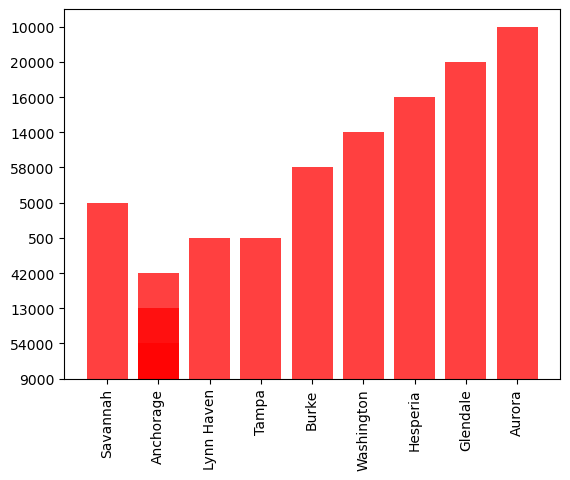

In [34]:
# Convert the types of column in pandas dataframe 

claim_amount=ins_claim_fraud["CLAIM_AMOUNT"].head(12).astype(str) 

incident_city=ins_claim_fraud["INCIDENT_CITY"].head(12).astype(str) 

plt.bar(incident_city,claim_amount, color="r" , alpha=0.75, align="center") 

plt.xticks(rotation=90) 

The r value is: 0.297


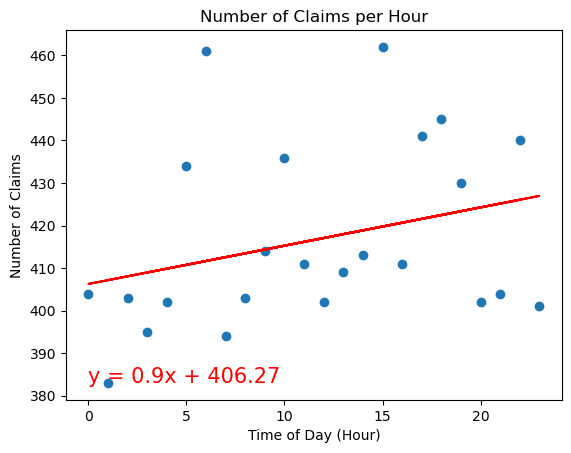

In [35]:
# Scatterplot with labels
plt.scatter(incident_hour_count.index,incident_hour_count)
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Claims")
plt.title("Number of Claims per Hour")

# Linregress function to get line of best fit/see if there is correlation in the data
(slope, intercept, r, p, err) = linregress(incident_hour_count.index,incident_hour_count)

# Round the slope, intercept, and r value outputs to simplify values
slope = round(slope,2)
intercept = round(intercept,2)
r = round(r,3)

# Create line equation using linregress() outputs
line_eqn = (slope*incident_hour_count.index) + intercept

# Plot line equation on scatterplot
plt.plot(incident_hour_count.index,line_eqn, color = "red")
# Plot equation text at min(x_axis),min(y_axis) so equation displays in bottom left corner
plt.text(min(incident_hour_count.index),min(incident_hour_count),f"y = {slope}x + {intercept}", color = "red", size = 15)
print(f"The r value is: {r}")


As depicted in the scatterplot, there is minimal correlation between the number of claims that occur per hour. We cannot firmly conclude that you are more likely to have false claims later in the day versus earlier.

Text(0.5, 1.0, 'Number of Claims per Hour')

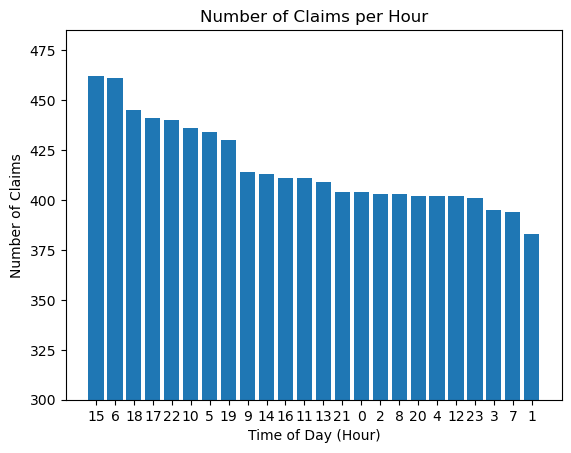

In [36]:
# Create bar plot of Claims per hour, sort by descending claim count
plt.bar(incident_hour_count.index.sort_values(),incident_hour_count)

#Create blank list and use for loop to append index values of incident_hour_count to list
claim_hour = []
for x in range(0,incident_hour_unique):
    claim_hour.append(incident_hour_count.index[x])

# Convert list to string so we can set the labels for the plot as string values
claim_hour = map(str,claim_hour)

# Plot x-ticks, making the range 0 to value count of incident hours and labels = new list
plt.xticks(range(0,incident_hour_unique), labels = list(claim_hour))
# Set min y value to 300 to see the difference more clearly
plt.ylim(bottom = 300)
# Label plot
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Claims")
plt.title("Number of Claims per Hour")



We can see from the bar plot that there are many claims made every hour, with the most being placed at the 15th hour. 

In [37]:
# What is the average cost for each type of insurance?
# Average claim amount?

avg_cost = ins_claim_fraud.groupby(['INSURANCE_TYPE'])['PREMIUM_AMOUNT'].mean()
avg_claim_amt = ins_claim_fraud.groupby(['INSURANCE_TYPE'])['CLAIM_AMOUNT'].mean()

average_dict = {
    'Average Premium Amount': avg_cost,
    'Average Claim Amount': avg_claim_amt
}

avg_cost_df = pd.DataFrame(average_dict).sort_values('Average Claim Amount', ascending=False)
avg_cost_df


,Average Premium Amount,Average Claim Amount
INSURANCE_TYPE,,
Life,74.685624,54386.444709
Property,119.554273,24573.877069
Health,149.382089,10801.183432
Motor,105.077497,5503.811944
Travel,74.335192,2979.640719
Mobile,8.978381,406.796690


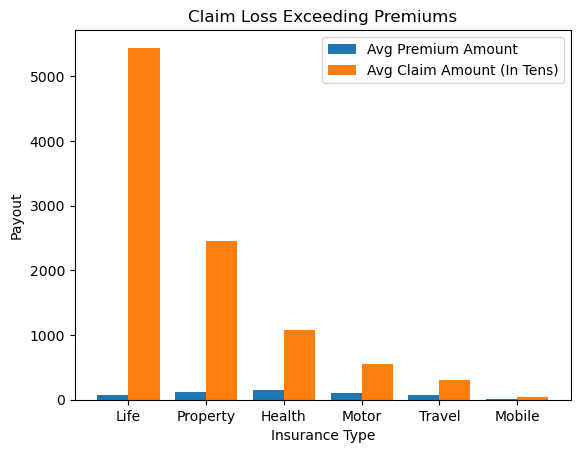

In [38]:
# Plot average amount by insurance type
# Ploting multiple bar charts > https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

x_axis = avg_cost_df.index.values
x_len = np.arange(len(x_axis))
premium = avg_cost_df['Average Premium Amount']
claim = (avg_cost_df['Average Claim Amount']/10)

plt.bar(x_len - 0.2, premium, 0.4, label = 'Avg Premium Amount') 
plt.bar(x_len + 0.2, claim, 0.4, label = 'Avg Claim Amount (In Tens)')
plt.xticks(x_len, x_axis)
plt.xlabel('Insurance Type') 
plt.ylabel('Payout') 
plt.title('Claim Loss Exceeding Premiums') 
plt.legend() 
plt.savefig('CSV Files/ClaimLossExceedingPremiums.png')
plt.show() 

Claims analysis keeps insurance companies current on policy claim trends. This type of analysis not only helps review products for overall performance, but analysis is also instrumental when trying to identify patterns of fraud. For example, if we take a look at our bar chart above we can easily see that the claim amount is significantly higher than the premium paid. This type of visual analysis can easily help detect a type of insurance fraud called "padding" which is a term used when claims are being inflated resulting in a much higher payout. 

Reference: https://www.iii.org/article/background-on-insurance-fraud

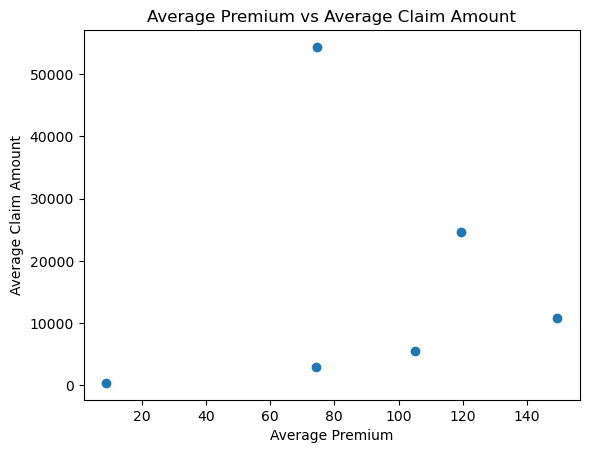

In [46]:
# Calculate correlation to test the relationship between the two variables

# correlation = st.pearsonr(avg_cost,avg_claim_amt)

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_cost,avg_claim_amt)
# regress_values = avg_cost * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(avg_cost,avg_claim_amt)
# plt.plot(avg_cost, regress_values, "r-")
# plt.title('Average Premium vs Average Claim Amount')
# plt.xlabel('Average Premium')
# plt.ylabel('Average Claim Amount')
# plt.savefig('CSV Files/AverageAmountPlot.png')
# print(f"The correlation between average premium and the average claim amount is {round(correlation[0],2)}.")
# plt.show()

plt.scatter(avg_cost, avg_claim_amt, marker='o')
plt.title('Average Premium vs Average Claim Amount')
plt.xlabel('Average Premium')
plt.ylabel('Average Claim Amount')
plt.savefig('CSV Files/AverageAmountPlot.png')
plt.show()

The correlation between insurance premium and claim amount is evident. As premium increase we see an increase in claim amount. Again this is a behavior that can raise suspicions of insurance fraud. Because the customer is paying a high premium, they feel the need to collect the cost of their insurance policy and than profit off of any amount exceeding their premium.


In [41]:
# Which risk segment is filing the most insurance claims?
# What is the total claim amount?

claim_count = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['POLICY_NUMBER'].count()
total_premium = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['PREMIUM_AMOUNT'].sum()
total_claim = ins_claim_fraud.groupby(['RISK_SEGMENTATION'])['CLAIM_AMOUNT'].sum()

risk_seg_dict = {
    'Total Claims': claim_count,
    'Total Premium Amount': total_premium,
    'Total Claim Amount': total_claim
}

risk_seg_df = pd.DataFrame(risk_seg_dict)

risk_seg_df['Total Claim Amount'] = risk_seg_df['Total Claim Amount'].map("${:,.2f}".format)
risk_seg_df['Total Premium Amount'] = risk_seg_df['Total Premium Amount'].map("${:,.2f}".format)
risk_seg_df


,Total Claims,Total Premium Amount,Total Claim Amount
RISK_SEGMENTATION,,,
H,1455,"$128,281.18","$24,481,000.00"
L,4395,"$391,876.26","$72,602,400.00"
M,4150,"$364,928.51","$68,554,900.00"


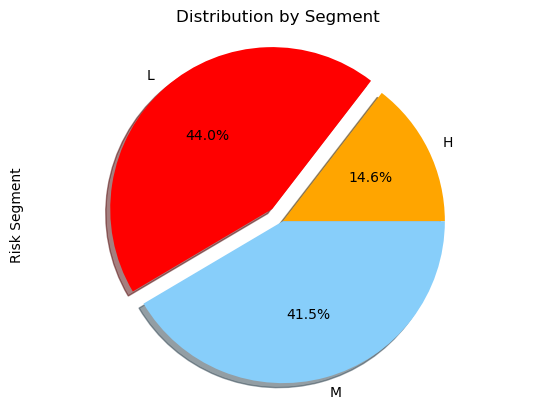

In [42]:
# Create pie chart to show distribution by risk segment
labels = risk_seg_df.index.values
count = risk_seg_df['Total Claims']
colors = ['orange', 'red', 'lightskyblue']
explode = (0, 0.1, 0)

plt.pie(count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Distribution by Segment')
plt.ylabel('Risk Segment')
plt.savefig('CSV Files/RiskSegPie.png')
plt.show()

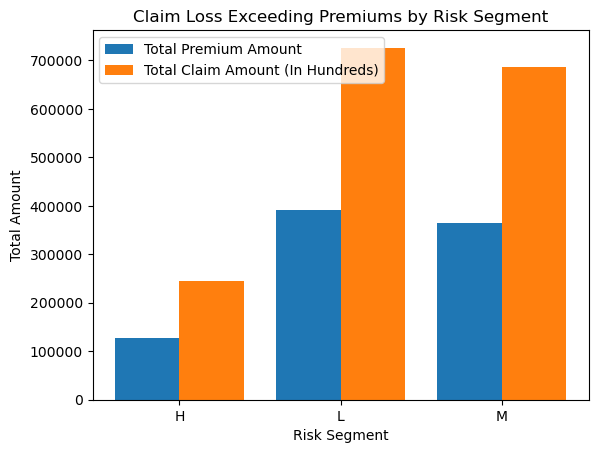

In [43]:
# Plot total premium vs claim by risk segment
x_axis = risk_seg_df.index.values
x_len = np.arange(len(x_axis))
premium = total_premium
claim = (total_claim/100)

plt.bar(x_len - 0.2, premium, 0.4, label = 'Total Premium Amount') 
plt.bar(x_len + 0.2, claim, 0.4, label = 'Total Claim Amount (In Hundreds)')
plt.xticks(x_len, x_axis)
plt.xlabel('Risk Segment') 
plt.ylabel('Total Amount') 
plt.title('Claim Loss Exceeding Premiums by Risk Segment') 
plt.legend()
plt.savefig('CSV Files/RiskSegBar.png')
plt.show()

Based on the risk assessment, insurance companies determine the premium amount that the insured person must pay. Usually higher-risk individuals are charged a higher premium because they are more likely to make claims. Looking at the distribution of claims made in each segment, we can see that the high-risk segment is actually the one submitting the least amount of claims with 44% of the claims coming from the low-risk segment. 

If we drill down a little deeper and compare the premium amount versus the total claim amount, we can clearly see that the total claim amount is significantly higher than the premium paid in the low-risk segment raising suspicions of insurance fraud.